<a href="https://colab.research.google.com/github/Chief-Buka/Reinforcement-learning/blob/main/10_armed_bandit_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem 2.5 from Sutton Barto RL 
#Comparing sample-average vs constant step size for updating action-value-estimates for non-stationary distribution on 10-armed bandit

#Constant step size does better because it continues to adapt as the distribution changes, but sample-average converges to a fixed value

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def initialize_arms(number_of_arms, ):
  #initialize the means of the arms using normal distribution (mean=0, std=1) 
  means = []
  for i in range(number_of_arms):
    means.append(np.random.normal(0, 1))

    #for each arm initialize the distribution using mean=prev_mean and std=1
  arms = []
  for i in range(number_of_arms):
    arms.append({'mean': means[i], 'std': 1})
  return arms

In [ ]:
def initialize_tables(number_of_arms, e_greedy_values):
  #Initialize the sample-average table(Q) and the number-of-actions-per-arm table(N)
  Q = dict()
  N = dict()
  for e_g in e_greedy_values:
    Q[e_g] = [0] * number_of_arms
    N[e_g] = [0] * number_of_arms
  return Q, N


In [ ]:
def run_bandits25(arms, e_greedy_values, Q1, Q2, N, num_steps=10000, first=False):

  #Track total reward
  total_rewards1 = dict()
  for e_g in e_greedy_values:
    total_rewards1[e_g] = 0

  #For graphing the values
  rewards1 = dict()
  for e_g in e_greedy_values:
    rewards1[e_g] = []

      #Track total reward
  total_rewards2 = dict()
  for e_g in e_greedy_values:
    total_rewards2[e_g] = 0

  #For graphing the values
  rewards2 = dict()
  for e_g in e_greedy_values:
    rewards2[e_g] = []

  #See an example of the (random walk) mean for actions
  dist = dict()
  for i in range(10):
    dist[i] = []

  #Loop
  for step in range(num_steps):
    #For each e-g value
    for e_g in e_greedy_values:

    #Choose action(arm) based on epsilon values 
      chance = np.random.uniform(0, 1)
    #Q1 - sample average
      if (chance < e_g):
        action = random.randint(0, len(arms)-1)
      else:
        action = np.argmax(Q1[e_g])
    #Get reward from that action
      reward1 = np.random.normal(arms[action]['mean'], arms[action]['std'])

      total_rewards1[e_g] += reward1

      #For plotting
      rewards1[e_g].append(reward1)

    #Q2 - constant step size
      if (chance < e_g):
        action = random.randint(0, len(arms)-1)
      else:
        action = np.argmax(Q2[e_g])
    #Get reward from that action
      reward2 = np.random.normal(arms[action]['mean'], arms[action]['std'])

      total_rewards2[e_g] += reward2

      #For plotting
      rewards2[e_g].append(reward2)


    #Update table (N) and update table (Q)
      N[e_g][action]+=1
      #Sample Average
      Q1[e_g][action] = Q1[e_g][action] + (1/(N[e_g][action]))*(reward1 - Q1[e_g][action])
      #Other
      Q2[e_g][action] = Q2[e_g][action] + (0.1)*(reward2 - Q2[e_g][action])

    #For non-stationary distribution take a random walk
    if first: 
      for i in range(10):
        dist[i].append(arms[i]['mean'])

    for arm in arms:
      arm['mean'] += np.random.normal(0, 0.01)

  return total_rewards1, rewards1, total_rewards2, rewards2, dist

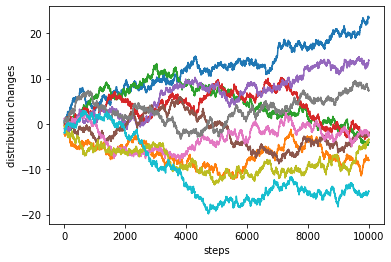

{0.1: 4882498.181465272}
{0.1: 4934578.580221846}


In [ ]:
#Sample Average vs Constant step-size parameter
number_of_arms = 10
arms = arms = initialize_arms(number_of_arms)
e_greedy_values = [.1]
first = True # only the first runs distribution should be plotted


avg_rewards1 = dict()
for e_g in e_greedy_values:
  avg_rewards1[e_g] = [0]*10000

avg_rewards2 = dict()
for e_g in e_greedy_values:
  avg_rewards2[e_g] = [0]*10000

for i in range(1000):
  Q1, N = initialize_tables(number_of_arms, e_greedy_values)
  Q2, _ = initialize_tables(number_of_arms, e_greedy_values)
  total_rewards1, rewards1, total_rewards2, rewards2, dist = run_bandits25(arms, e_greedy_values, Q1, Q2, N, 10000, first)
  
  if first:
    x = [i for i in range(10000)]
    for i in range(10):
      plt.plot(x, dist[i])

    plt.plot()

    plt.xlabel('steps')
    plt.ylabel('distribution changes')
    plt.show()

  first = False

  #Accumulate the rewards for each e-value for each step
  for e_g in e_greedy_values:
    for i in range(10000):
      avg_rewards1[e_g][i] += rewards1[e_g][i]
  for e_g in e_greedy_values:
    for i in range(10000):
      avg_rewards2[e_g][i] += rewards2[e_g][i]

#Average the rewards
for e_g in e_greedy_values:
  for i in range(10000):
    avg_rewards1[e_g][i] /= 10000
for e_g in e_greedy_values:
  for i in range(10000):
    avg_rewards2[e_g][i] /= 10000

print(total_rewards1)
print(total_rewards2)

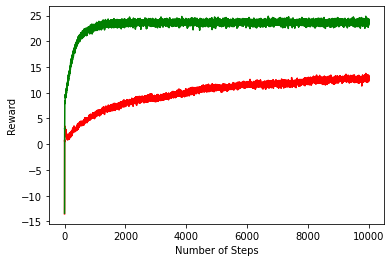

In [ ]:
x = [i for i in range(10000)]
y = avg_rewards1[.1]
z = avg_rewards2[.1]

#The sample average distribution will have less average reward
#because it updates the value-estimates less and less even though the action-value distributions continue to change
plt.plot(x, y, 'r')
plt.plot(x, z, 'g')

plt.plot()
plt.xlabel('Number of Steps')
plt.ylabel('Reward')
plt.show()